<a href="https://colab.research.google.com/github/hana-dool/Pytorch/blob/master/10.NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 setting

우선 필요한 도구를 임포트하고, GPU 연산이 가능할 경우에는 GPU 연산을 할 수 있도록 설정해줍니다.

In [5]:
import torch
import torch.nn as nn 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777) # 기본 torch 의 random 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777) # gpu 사용시 random 고정

# Data setting

In [6]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device) # to('gpu') : gpu 에 텐서를 복사본을 생성해 저장
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

# Model(단층 퍼셉트론) construct

1개의 뉴런<br>
활성화 함수는 sigmoid<br>
x input 은 특성이 2개<br>
y output 은 특성이 1개 (0,1 class)<br>

In [7]:
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

In [8]:
# 0 또는 1을 예측하는 이진 분류 문제이므로 비용 함수로는 크로스엔트로피 함수를 사용합니다.
# 비용 함수와 옵티마이저 정의
criterion = torch.nn.BCELoss().to(device) # nn.BCEloss() 는 이진분류에서 사용하는 크로스 엔트로피 함수

# GPU CUDA를 사용할 계획이라면 optimizer를 정의하기 전에 미리 해놓아야 한다 (model 에서)
# optimizer는 argument로 model의 parameter를 입력받는다.
#.cuda()를 쓰면 모델의 parameter가 cpu 대신 gpu에 올라가는 것이므로 다른 object가 된다.
# 따라서 optimizer에 model parameter의 위치를 전달한 후 model 에다가 .cuda()를 실행하면, 학습시켜야 할 parameter는 GPU에 올라가 있는데 optimizer는 cpu에 올라간 엉뚱한 parameter 위치를 참조하고 있는 것이 된다.
optimizer = torch.optim.SGD(model.parameters(), lr=1)


In [9]:
for step in range(100): 
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 10 == 0: # 100번째 에포크마다 비용 출력
        print(step, cost.item())

0 0.7273974418640137
10 0.6951164603233337
20 0.6937781572341919
30 0.6933605670928955
40 0.6932238340377808
50 0.69317626953125
60 0.6931588053703308
70 0.6931519508361816
80 0.6931492686271667
90 0.6931480765342712


In [10]:
# with 을 torch.no_grad() 와 같이 적용된다고 하면 업데이팅이 되지 않는다.
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float() # 0.5 를 threshold 로 정하자.
    accuracy = (predicted == Y).float().mean() 
    # float() 을 취함으로서 True -> 1 / Fasle -> 0
    # mean() 을 취함으로서, accuracy 를 계산한다.
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5007058 ]
 [0.5002256 ]
 [0.4999959 ]
 [0.49951577]]
모델의 예측값(Predicted):  [[1.]
 [1.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


# Model(다층 퍼셉트론) construct

In [11]:
model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()).to(device)

In [12]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

In [13]:
for epoch in range(1000):
    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    # 100의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 100 == 0:
        print('epoch : {0:3d}   cost : {1:.4f}'.format(epoch, cost.item()))


epoch :   0   cost : 0.6941
epoch : 100   cost : 0.6931
epoch : 200   cost : 0.6931
epoch : 300   cost : 0.6931
epoch : 400   cost : 0.6931
epoch : 500   cost : 0.6931
epoch : 600   cost : 0.6931
epoch : 700   cost : 0.6931
epoch : 800   cost : 0.6931
epoch : 900   cost : 0.6931


In [14]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.4991978 ]
 [0.49959978]
 [0.5004729 ]
 [0.5006879 ]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [1.]
 [1.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


# Mnist 예제

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

In [20]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [21]:
print(digits.target[0])

0


In [22]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


In [23]:
digits.images.shape

(1797, 8, 8)

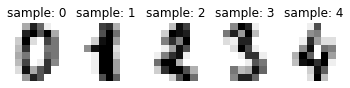

In [24]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [31]:
for i in range(5):
    print(i,'번 인덱스 샘플의 레이블 : ',digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [32]:
print(digits.data[0])  # digit data 에는 8*8 matrix 형태가 아니라 1dim 의 array 형태로 저장되어있다.

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [33]:
X = digits.data # 이미지. 즉, 특성 행렬 
Y = digits.target # 각 이미지에 대한 레이블

In [34]:
import torch
import torch.nn as nn
from torch import optim

In [41]:
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(), # activation relu 
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)

In [42]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

<ipython-input-42-ec09ccdb9262>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
<ipython-input-42-ec09ccdb9262>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y, dtype=torch.int64)


In [43]:
loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있음.

In [44]:
optimizer = optim.Adam(model.parameters())

In [45]:
losses = []

In [46]:
for epoch in range(100):
    optimizer.zero_grad() # zero 초기화
    y_pred = model(X) # forwar 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

    losses.append(loss.item())

Epoch    0/100 Cost: 3.258866
Epoch   10/100 Cost: 2.153898
Epoch   20/100 Cost: 1.785959
Epoch   30/100 Cost: 1.485890
Epoch   40/100 Cost: 1.189625
Epoch   50/100 Cost: 0.929273
Epoch   60/100 Cost: 0.724908
Epoch   70/100 Cost: 0.573658
Epoch   80/100 Cost: 0.463671
Epoch   90/100 Cost: 0.383508


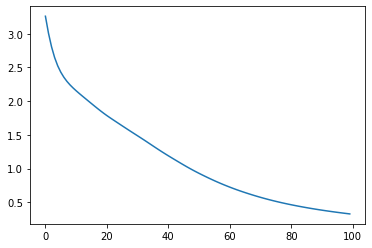

In [47]:
plt.plot(losses)